In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
print('Hello World!!!')

Hello World!!!


In [3]:
url = 'https://docs.google.com/spreadsheets/d/1CK6MPX0Ba6hUm_4TYTaW9ini1rB00hmHpKTNs_8IOec/export?format=csv'
df = pd.read_csv(url)

In [4]:
df.head()

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
0,1,2019-04-12,59,46-60,SMS,2,0,received,0,0
1,2,2019-04-08,27,18-30,Email,2,0,received,0,0
2,3,2019-04-05,74,60+,Email,2,0,received,0,0
3,4,2019-04-21,32,31-45,SMS,2,0,received,0,0
4,5,2019-04-28,42,31-45,Email,2,0,received,0,0


In [5]:
print(df.shape)
print(df.columns)

(300000, 10)
Index(['id', 'send_date', 'estimated_age', 'age_range', 'channel', 'coupon',
       'clicked', 'last_step', 'nb_units', 'order_value'],
      dtype='object')


# Check duplicate data

In [6]:
duplicate=df.duplicated()
duplicate.sum()

0

In [7]:
# Check empty column
df.isnull().sum()

id               0
send_date        0
estimated_age    0
age_range        0
channel          0
coupon           0
clicked          0
last_step        0
nb_units         0
order_value      0
dtype: int64

# Pie chart show number of customer per age range

In [8]:
df['age_range'].value_counts()

age_range
31-45    122900
18-30    102107
46-60     50893
60+       24100
Name: count, dtype: int64

In [9]:
import plotly.express as px
chart = df.groupby(['age_range']).size()
fig = px.pie(values=chart.values, names=chart.index, title='No. of customers as per age range', width=600, height=400)
fig.show()

# No. of customers reached via Email or SMS

In [10]:
df["channel"].value_counts()

channel
SMS      163511
Email    136489
Name: count, dtype: int64

In [11]:
chart_2 = df.groupby(['channel']).size()
fig = px.pie(values=chart_2.values, names=chart_2.index, title='Customer Channel Status', width=600, height=400)
fig.show()

# No. of customers per coupon value that sent

In [12]:
df['coupon'].value_counts()

coupon
2    180085
4     75163
6     44752
Name: count, dtype: int64

In [13]:
chart_cus_per_coupon = df[['coupon']]
chart_cus_per_coupon = chart_cus_per_coupon.coupon.value_counts().head()
chart_cus_per_coupon = pd.DataFrame(chart_cus_per_coupon)

Text(0.5, 1.0, 'No. of customers per coupon value')

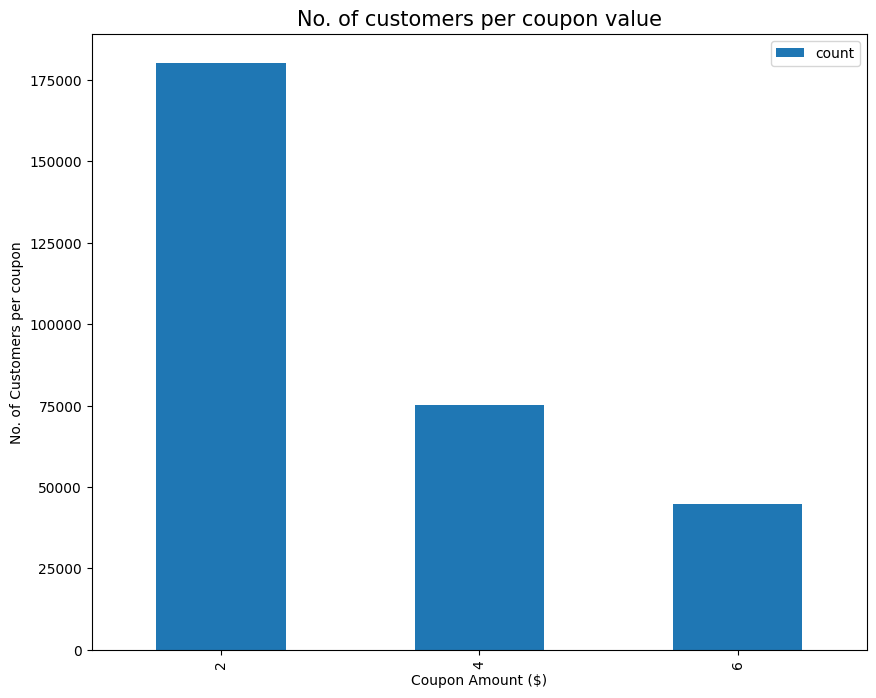

In [14]:
chart_cus_per_coupon.plot(kind='bar',figsize=(10,8));
plt.xlabel('Coupon Amount ($)', fontsize= 10)
plt.ylabel('No. of Customers per coupon', fontsize= 10)
plt.title('No. of customers per coupon value',fontsize=15)

# Customer's click rate and which last action that they took

In [15]:
df['clicked'].value_counts()

clicked
0    282234
1     17766
Name: count, dtype: int64

In [16]:
chart_clicked = df.groupby(['clicked']).size()
fig = px.pie(values=chart_clicked.values, names=chart_clicked.index, title='Customer Click Status', width=600, height=400)
fig.show()

In [17]:
cus_click = df.loc[df['clicked'] == 1]
cus_click

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
26,27,2019-04-19,37,31-45,Email,2,1,bounced,0,0
51,52,2019-04-21,55,46-60,Email,4,1,bounced,0,0
52,53,2019-04-26,40,31-45,SMS,2,1,added to cart,0,0
64,65,2019-04-09,40,31-45,SMS,2,1,bounced,0,0
70,71,2019-04-25,24,18-30,Email,2,1,purchased,1,38
...,...,...,...,...,...,...,...,...,...,...
299932,299933,2019-04-29,28,18-30,SMS,4,1,added to cart,0,0
299950,299951,2019-04-14,41,31-45,Email,4,1,saw review,0,0
299958,299959,2019-04-22,40,31-45,SMS,2,1,bounced,0,0
299960,299961,2019-04-25,52,46-60,SMS,4,1,bounced,0,0


In [18]:
cus_click['age_range'].value_counts()

age_range
31-45    7778
18-30    6205
46-60    3265
60+       518
Name: count, dtype: int64

In [19]:
chart_age_range_click_on = cus_click.groupby(['age_range']).size()
fig = px.pie(values=chart_age_range_click_on.values, names=chart_age_range_click_on.index, title='No. of customer that clicked in the link and their age range', width=600, height=400)
fig.show()

In [20]:
cus_click['channel'].value_counts()

channel
SMS      10062
Email     7704
Name: count, dtype: int64

## No. of customer that clicked in the link and which action that they took in last step

In [21]:
chart_last_step = cus_click[['last_step']]
chart_last_step = chart_last_step.last_step.value_counts().head()
chart_last_step = pd.DataFrame(chart_last_step)

Text(0, 0.5, 'Action taken by the customer')

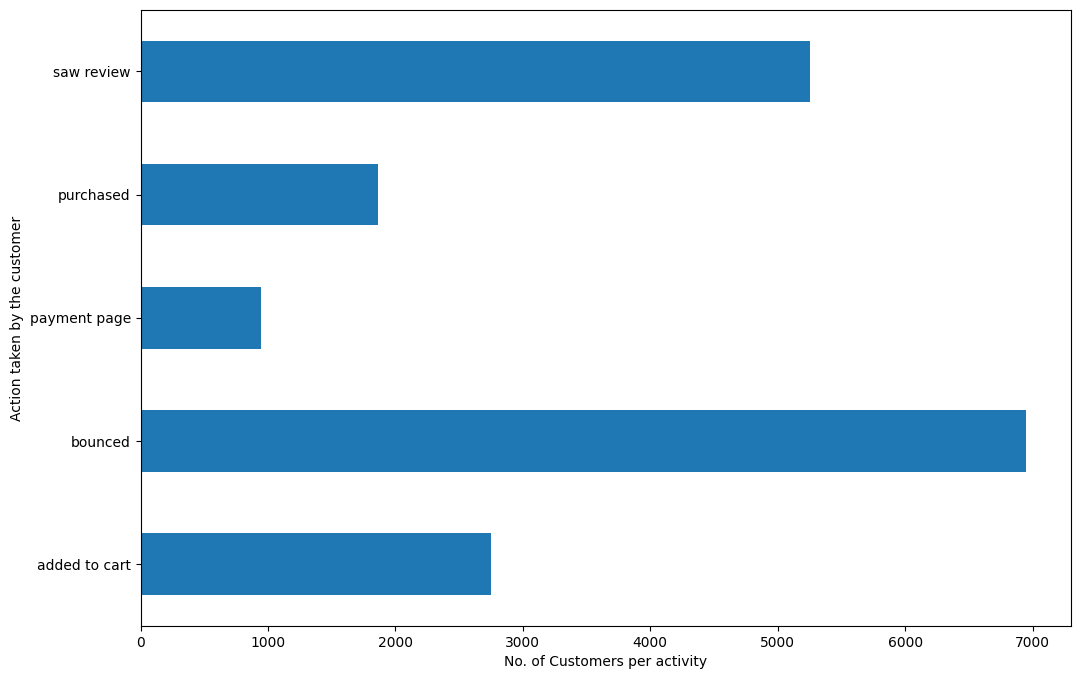

In [22]:
chart_last_step = cus_click.groupby(['last_step']).size()
fig = px.pie(values=chart_last_step.values, names=chart_last_step.index, title='No. of customer that clicked in the link and which action that they took in last step', width=600, height=400)
fig.show()

chart_last_step.plot(kind='barh',figsize=(12,8));
plt.xlabel('No. of Customers per activity', fontsize= 10)
plt.ylabel('Action taken by the customer', fontsize= 10)

As we can see, we sent out advertising for 300,000 customers, but just 17,766 customers clicked. Out of 17,766, we're having 10,062 responded via SMS and 7,704 responded via email. In my view, it will be made more sense to spend more on SMS channel.

Beside that, out of 17,766 customers that clicked on the link, we're just having ***around 10%*** that going to make an order (***Purchased***). Most of them clicked on then exit immediately (***Bounced - ~40%***) and from the above, we're also having almost 94% customers **didn't click** on the link . Hence I think we should take feedback, also consider improving our website UX/UI and performance.

## Which age range that had ordered mostly?

In [23]:
purchase = cus_click.loc[df['last_step'] == 'purchased']
purchase

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
70,71,2019-04-25,24,18-30,Email,2,1,purchased,1,38
116,117,2019-05-01,40,31-45,Email,2,1,purchased,3,114
531,532,2019-04-14,22,18-30,Email,4,1,purchased,2,72
658,659,2019-04-03,53,46-60,SMS,2,1,purchased,30,1194
664,665,2019-04-01,43,31-45,Email,4,1,purchased,1,36
...,...,...,...,...,...,...,...,...,...,...
299608,299609,2019-04-24,31,31-45,Email,4,1,purchased,2,72
299621,299622,2019-04-24,20,18-30,SMS,2,1,purchased,1,38
299626,299627,2019-04-30,19,18-30,Email,2,1,purchased,2,76
299750,299751,2019-04-07,40,31-45,Email,4,1,purchased,1,36


In [24]:
purchase['channel'].value_counts()

channel
Email    948
SMS      914
Name: count, dtype: int64

In [25]:
purchase['age_range'].value_counts()

age_range
31-45    743
18-30    699
46-60    412
60+        8
Name: count, dtype: int64

In [26]:
purchase.groupby('age_range').sum('order_value').reset_index()[['age_range','order_value']]

,age_range,order_value
0,18-30,44128
1,31-45,45758
2,46-60,25466
3,60+,512


In the group that customers had placed order(s), we don't have many different between clicking via SMS or Email (***914 vs 948***). However, we'll have a big different about the revenue between these age range. As we can see, we're attracting more orders and revenue from the group of age range (***18-30 and 31-45***) than others, almost 3 times.

To combine with the click rate in the previous analysis, this is ideal evidence to **invest more** on these age range due to click rate and revenue higher than the rest.

## Problem with payment page???

In [27]:
payment = cus_click.loc[df['last_step'] == 'payment page']
payment

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
253,254,2019-04-22,52,46-60,Email,2,1,payment page,0,0
675,676,2019-04-28,34,31-45,SMS,2,1,payment page,0,0
844,845,2019-04-22,27,18-30,SMS,4,1,payment page,0,0
1061,1062,2019-04-27,33,31-45,Email,4,1,payment page,0,0
1183,1184,2019-04-13,20,18-30,SMS,4,1,payment page,0,0
...,...,...,...,...,...,...,...,...,...,...
299308,299309,2019-04-09,25,18-30,SMS,2,1,payment page,0,0
299525,299526,2019-04-28,18,18-30,SMS,2,1,payment page,0,0
299658,299659,2019-04-09,42,31-45,SMS,2,1,payment page,0,0
299736,299737,2019-04-14,19,18-30,SMS,4,1,payment page,0,0


In [28]:
payment['age_range'].value_counts()

age_range
18-30    504
31-45    194
46-60    143
60+      108
Name: count, dtype: int64

Out of 17,766 customers that clicked on the link, we're having **949** customers (***~5%***) that **stopped** at Payment page, and the majority of them is young generation(**genZ**) with ***more than 50%*** . This is a big quesion, why genZ - the generation that familar with the online shopping that stop in Payment page? Do we have issue with this page? Or should we give more coupon?

In my opinion, I think we should have another campagin to collect the user experience with our website (include Payment page). Although this is just ~5% that stopped, but no means that this rate ***can't be increased*** in the future. In the opposite, if we can improve it, I believe that we ***can increase*** our Net Profit.

## Add to cart and Saw review rate

In [29]:
add_to_cart = cus_click.loc[df['last_step'] == 'added to cart']
add_to_cart

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
52,53,2019-04-26,40,31-45,SMS,2,1,added to cart,0,0
105,106,2019-04-13,23,18-30,Email,4,1,added to cart,0,0
110,111,2019-04-26,31,31-45,SMS,2,1,added to cart,0,0
367,368,2019-04-16,58,46-60,SMS,2,1,added to cart,0,0
504,505,2019-04-13,42,31-45,SMS,2,1,added to cart,0,0
...,...,...,...,...,...,...,...,...,...,...
299539,299540,2019-04-22,37,31-45,SMS,2,1,added to cart,0,0
299580,299581,2019-04-19,45,31-45,SMS,2,1,added to cart,0,0
299807,299808,2019-04-08,30,18-30,SMS,2,1,added to cart,0,0
299834,299835,2019-04-09,23,18-30,SMS,2,1,added to cart,0,0


In [30]:
add_to_cart['age_range'].value_counts()

age_range
31-45    1260
18-30     803
46-60     664
60+        26
Name: count, dtype: int64

In [31]:
saw_review = cus_click.loc[df['last_step'] == 'saw review']
saw_review

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
86,87,2019-04-30,34,31-45,SMS,2,1,saw review,0,0
112,113,2019-04-01,37,31-45,Email,2,1,saw review,0,0
124,125,2019-04-01,29,18-30,SMS,2,1,saw review,0,0
344,345,2019-04-22,44,31-45,Email,6,1,saw review,0,0
394,395,2019-04-25,22,18-30,SMS,4,1,saw review,0,0
...,...,...,...,...,...,...,...,...,...,...
299774,299775,2019-04-03,41,31-45,Email,4,1,saw review,0,0
299822,299823,2019-04-30,47,46-60,Email,6,1,saw review,0,0
299931,299932,2019-04-06,45,31-45,Email,2,1,saw review,0,0
299950,299951,2019-04-14,41,31-45,Email,4,1,saw review,0,0


In [32]:
saw_review['age_range'].value_counts()

age_range
31-45    2393
18-30    1953
46-60     697
60+       209
Name: count, dtype: int64

Continue to dig on which action that customer do after clicked on the link, although we **can't go** to final step (***Purchased***), 18-30 and 31-45 are still being the 2 leading groups in both Added to cart and Saw review.

Once again, this is important evidence to show that we should invest more on these 2 group with the prior as 31-45, then 18-30 and the rest.

In the overall, 18-30 and 31-45 are 2 groups that we should focus on.

# 2a. For the next quarter, your marketing department has a budget of $60,000 to spend on online campaigns. How would you allocate it between SMS and Email?

Base on my analysis and the given dataset above, in the group of 18-30 and 31-45 that had placed an order, the rate click between SMS and Email are equal. Due to SMS is cheapter, I suggest that we could spend more on SMS than Email (60% of budget for SMS channel and 40% for Email channel).

Although we're having group of 46 - 60 is the largest pool size, however, base on my analysis I would tend to incline more towards the 18-30 and 31-45 age groups as they seem more techinque and brought to us more revenue. 45% of 60,000 for group of 31-45 which is 27,000; around 34% for group of 18-30 is 20,000; for group of 46-60 will receive around 16% which is 9,600; and the rest is for group of 60+ which is low tech, will be allocate around 3,400 which approximately 5%.

# 2b. Now assume that you are also responsible for the operation of the company’s website. Do you have  any comments or suggestions so that we can improve the website’s performance in order to maximize net profit?

To improve the website's performance and maximize net profit, consider the following:
*   Make sure the website is able to handle huge amount of traffic as the poolsize increases and give each customer good experience.
*   Optimize the Checkout Process: As I said in the analysis for reason why we're having some customers (around 9%) that stopped in Payment page, I think we should run a campagin to collect user feedback, parallel with this campaign, we should improve from our side.
*   Do the A/B Testing: Continuously test different versions of web pages to see which one performs better in terms of conversion rates.
*   Customer Feedback: Implement a feedback mechanism to understand why customers are leaving at certain stages (bad gateway, UX/UI hard to view/use, not attracting, ...). Beside that, we need to hear from customer about their experience on our product
*   Content Optimization and Classification: Ensure that the "saw review" step provides compelling and convincing content to encourage purchases.
*   Offering some benifits for customer that back to us from the second times.











If I have more time and more data about coupon that customers had applied, I will dig more in detail and consider should or shouldn't we give more vouchers?